In [2]:
from population import Population
from group_testing import HouseholdGroupTest
from static_simulation import StaticSimulation
from frequency import frequency

doubling_time = 3.0
alpha = 2 ** (1/doubling_time)
SAR = 0.374

#https://www.statista.com/statistics/242189/disitribution-of-households-in-the-us-by-household-size/
us_household_dist = [0.2837, 0.3451, 0.1507, 0.1276, 0.0578, 0.0226, 0.0125]

beta = 1
FNR = 0.3
FPR = 0.1
uspop = 328E6
tests_per_week_ub = 6E6

tests_per_week_per_person_ub = tests_per_week_ub / uspop


In [3]:
target_prevalence = 0.005

# initial_prevalence depends target_prevalence, SAR, and household-size dist 
# this value was computed elsewhere using monte-carlo estimation of E[target_prevalence]
initial_prevalence = 0.0027734375

pop = Population(n_households=22500, # Should be big relative to the largest group size
                      household_size_dist=us_household_dist,
                      target_prevalence=target_prevalence,
                      disease_length=0,
                      time_until_symptomatic=0,
                      non_quarantine_alpha=alpha,
                      daily_secondary_attack_rate=SAR,
                      fatality_pct=0,
                      daily_outside_infection_pct=0,
                      outside_symptomatic_prob=0,
                      initial_quarantine=0,
                        initial_prevalence=initial_prevalence)

group_sizes = list(range(30,151,10))
nreps = 100

In [4]:

sim_outputs = {}
for group_size in group_sizes:
    group_test = HouseholdGroupTest(group_size, 1, FNR, FPR)
    QFNR, QFPR, tests_per_person, quarantines_per_person = StaticSimulation(pop,group_test).sim(nreps)
    days_between_tests = frequency(QFNR, pop.non_quarantine_alpha, beta)
    sim_outputs[group_size] = {'QFNR': QFNR,
                                'QFPR': QFPR,
                              'tests_per_person_per_week': tests_per_person / (days_between_tests / 7.0),
                              'quarantines_per_person': quarantines_per_person,
                              'days_between_tests': days_between_tests}
    print("For group size {}, computed tests/person/week {:.2f}, days between tests {:.2f}, quarantines/person {:.2f}".format(
        group_size, sim_outputs[group_size]['tests_per_person_per_week'], days_between_tests, quarantines_per_person))

sim_outputs_gollier = sim_outputs

For group size 30, computed tests/person/week 0.02, days between tests 9.82, quarantines/person 0.16
For group size 40, computed tests/person/week 0.02, days between tests 9.89, quarantines/person 0.18
For group size 50, computed tests/person/week 0.01, days between tests 9.73, quarantines/person 0.20
For group size 60, computed tests/person/week 0.01, days between tests 9.91, quarantines/person 0.22
For group size 70, computed tests/person/week 0.01, days between tests 10.10, quarantines/person 0.23
For group size 80, computed tests/person/week 0.01, days between tests 9.93, quarantines/person 0.25
For group size 90, computed tests/person/week 0.01, days between tests 10.40, quarantines/person 0.27
For group size 100, computed tests/person/week 0.01, days between tests 10.38, quarantines/person 0.29
For group size 110, computed tests/person/week 0.01, days between tests 10.38, quarantines/person 0.30
For group size 120, computed tests/person/week 0.01, days between tests 10.43, quaran

In [5]:
from group_testing import MatrixGroupTest

sim_outputs = {}
for group_size in group_sizes:
    group_test = MatrixGroupTest(group_size, FNR, FPR, fnr_at_swab_level=False)
    QFNR, QFPR, tests_per_person, quarantines_per_person = StaticSimulation(pop,group_test).sim(nreps)
    days_between_tests = frequency(QFNR, pop.non_quarantine_alpha, beta)
    sim_outputs[group_size] = {'QFNR': QFNR,
                                'QFPR': QFPR,
                              'tests_per_person_per_week': tests_per_person / (days_between_tests / 7.0),
                              'quarantines_per_person': quarantines_per_person,
                              'days_between_tests': days_between_tests}
    print("For group size {}, computed tests/person/week {:.2f}, days between tests {:.2f}, quarantines/person {:.2f}".format(
        group_size, sim_outputs[group_size]['tests_per_person_per_week'], days_between_tests, quarantines_per_person))
    
sim_outputs_matrix_swab_false = sim_outputs
    

For group size 30, computed tests/person/week 0.06, days between tests 7.08, quarantines/person 0.03
For group size 40, computed tests/person/week 0.05, days between tests 7.33, quarantines/person 0.04
For group size 50, computed tests/person/week 0.04, days between tests 7.26, quarantines/person 0.04
For group size 60, computed tests/person/week 0.03, days between tests 7.42, quarantines/person 0.05
For group size 70, computed tests/person/week 0.03, days between tests 7.53, quarantines/person 0.06
For group size 80, computed tests/person/week 0.02, days between tests 7.57, quarantines/person 0.07
For group size 90, computed tests/person/week 0.02, days between tests 7.56, quarantines/person 0.08
For group size 100, computed tests/person/week 0.02, days between tests 7.74, quarantines/person 0.08
For group size 110, computed tests/person/week 0.02, days between tests 7.89, quarantines/person 0.10
For group size 120, computed tests/person/week 0.01, days between tests 7.86, quarantines

In [6]:
from group_testing import MatrixGroupTest

sim_outputs = {}
for group_size in group_sizes:
    group_test = MatrixGroupTest(group_size, FNR, FPR, fnr_at_swab_level=True)
    QFNR, QFPR, tests_per_person, quarantines_per_person = StaticSimulation(pop,group_test).sim(nreps)
    days_between_tests = frequency(QFNR, pop.non_quarantine_alpha, beta)
    sim_outputs[group_size] = {'QFNR': QFNR,
                                'QFPR': QFPR,
                              'tests_per_person_per_week': tests_per_person / (days_between_tests / 7.0),
                              'quarantines_per_person': quarantines_per_person,
                              'days_between_tests': days_between_tests}
    print("For group size {}, computed tests/person/week {:.2f}, days between tests {:.2f}, quarantines/person {:.2f}".format(
        group_size, sim_outputs[group_size]['tests_per_person_per_week'], days_between_tests, quarantines_per_person))

    
sim_outputs_matrix_swab_true = sim_outputs    

For group size 30, computed tests/person/week 0.05, days between tests 9.61, quarantines/person 0.03
For group size 40, computed tests/person/week 0.04, days between tests 9.36, quarantines/person 0.04
For group size 50, computed tests/person/week 0.03, days between tests 9.73, quarantines/person 0.05
For group size 60, computed tests/person/week 0.02, days between tests 9.54, quarantines/person 0.05
For group size 70, computed tests/person/week 0.02, days between tests 9.62, quarantines/person 0.06
For group size 80, computed tests/person/week 0.02, days between tests 9.66, quarantines/person 0.07
For group size 90, computed tests/person/week 0.02, days between tests 9.94, quarantines/person 0.08
For group size 100, computed tests/person/week 0.01, days between tests 9.73, quarantines/person 0.09
For group size 110, computed tests/person/week 0.01, days between tests 9.75, quarantines/person 0.10
For group size 120, computed tests/person/week 0.01, days between tests 9.86, quarantines

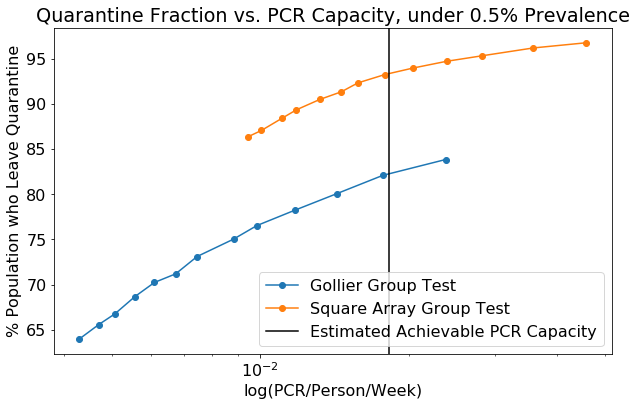

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams.update({'font.size': 16})

plt.figure(figsize=(10,6))

def add_plot(sim, label):
    plt.plot([sim[group_size]['tests_per_person_per_week'] for group_size in group_sizes],
             [100 * (1 - sim[group_size]['quarantines_per_person']) for group_size in group_sizes],
             label=label, marker='o')

add_plot(sim_outputs_gollier, "Gollier Group Test")
#add_plot(sim_outputs_matrix_swab_false, "Matrix Group Test, Test-level Errors")
add_plot(sim_outputs_matrix_swab_true, "Square Array Group Test")

plt.axvline(tests_per_week_per_person_ub, label="Estimated Achievable PCR Capacity", color='black')


plt.xlabel("log(PCR/Person/Week)")
plt.xscale('log')

plt.ylabel("% Population who Leave Quarantine")

plt.legend(loc='best')

plt.title("Quarantine Fraction vs. PCR Capacity, under 0.5% Prevalence")
plt.show()

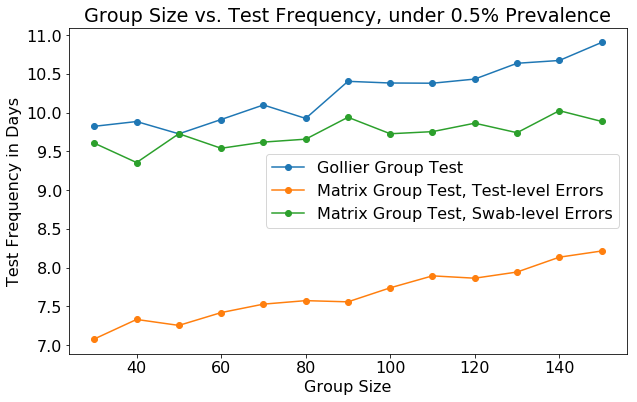

In [9]:
plt.figure(figsize=(10,6))

def add_plot(sim, label):
    plt.plot(group_sizes,
             [sim[group_size]['days_between_tests'] for group_size in group_sizes],
             label=label, marker='o')

add_plot(sim_outputs_gollier, "Gollier Group Test")
add_plot(sim_outputs_matrix_swab_false, "Matrix Group Test, Test-level Errors")
add_plot(sim_outputs_matrix_swab_true, "Matrix Group Test, Swab-level Errors")


plt.xlabel("Group Size")

plt.ylabel("Test Frequency in Days")

plt.legend(loc='best')

plt.title("Group Size vs. Test Frequency, under 0.5% Prevalence")
plt.show()

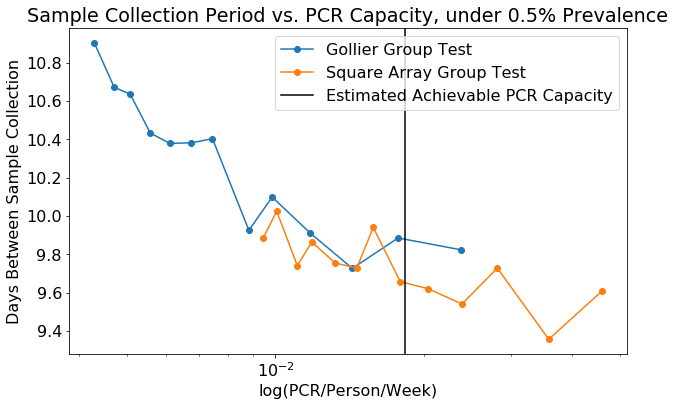

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams.update({'font.size': 16})

plt.figure(figsize=(10,6))

def add_plot(sim, label):
    plt.plot([sim[group_size]['tests_per_person_per_week'] for group_size in group_sizes],
             [sim[group_size]['days_between_tests'] for group_size in group_sizes],
             label=label, marker='o')

add_plot(sim_outputs_gollier, "Gollier Group Test")
#add_plot(sim_outputs_matrix_swab_false, "Matrix Group Test, Test-level Errors")
add_plot(sim_outputs_matrix_swab_true, "Square Array Group Test")

plt.axvline(tests_per_week_per_person_ub, label="Estimated Achievable PCR Capacity", color='black')

plt.xlabel("log(PCR/Person/Week)")
plt.xscale('log')

plt.ylabel("Days Between Sample Collection")

plt.legend(loc='best')

plt.title("Sample Collection Period vs. PCR Capacity, under 0.5% Prevalence")
plt.show()

In [18]:
from group_testing import MatrixGroupTest

def recompute_with_beta(sim_outputs, beta):
    for group_size in group_sizes:
        QFNR = sim_outputs[group_size]['QFNR']
        orig_days = sim_outputs[group_size]['days_between_tests']
        orig_tests_per_person = sim_outputs[group_size]['tests_per_person_per_week']
        tests_per_person = orig_tests_per_person * (orig_days / 7.0)
        days_between_tests = frequency(QFNR, pop.non_quarantine_alpha, beta)
        sim_outputs[group_size]['days_between_tests_beta_{:.4f}'.format(beta)] = days_between_tests
        sim_outputs[group_size]['tests_per_person_per_week_beta_{:.4f}'.format(beta)] = \
            tests_per_person / (days_between_tests / 7.0)
        
    
beta = 0.5 ** (1/7)

recompute_with_beta(sim_outputs_gollier, beta)
recompute_with_beta(sim_outputs_matrix_swab_true, beta)

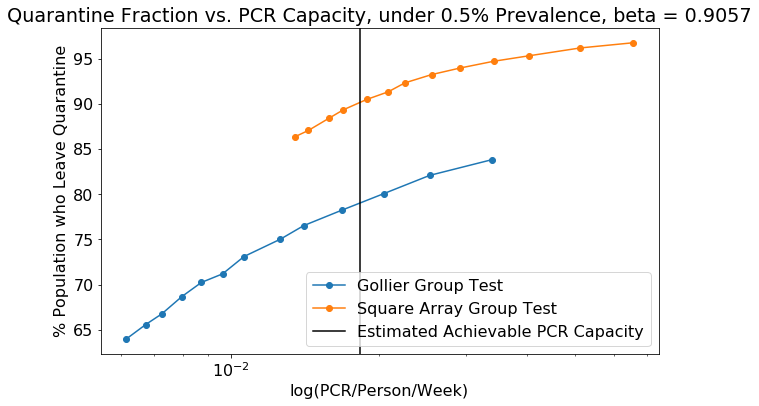

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams.update({'font.size': 16})

plt.figure(figsize=(10,6))

def add_plot(sim, label, beta):
    plt.plot([sim[group_size]['tests_per_person_per_week_beta_{:.4f}'.format(beta)] for group_size in group_sizes],
             [100 * (1 - sim[group_size]['quarantines_per_person']) for group_size in group_sizes],
             label=label, marker='o')

add_plot(sim_outputs_gollier, "Gollier Group Test", beta)
#add_plot(sim_outputs_matrix_swab_false, "Matrix Group Test, Test-level Errors")
add_plot(sim_outputs_matrix_swab_true, "Square Array Group Test", beta)

plt.axvline(tests_per_week_per_person_ub, label="Estimated Achievable PCR Capacity", color='black')


plt.xlabel("log(PCR/Person/Week)")
plt.xscale('log')

plt.ylabel("% Population who Leave Quarantine")

plt.legend(loc='best')

plt.title("Quarantine Fraction vs. PCR Capacity, under 0.5% Prevalence, beta = {:.4f}".format(beta))
plt.show()

In [6]:
group_sizes = list(range(30,121,10))
nreps = 100
sim_outputs = {}
for group_size in group_sizes:
    group_test = HouseholdGroupTest(group_size, 1, FNR, FPR)
    QFNR, QFPR, tests_per_person, quarantines_per_person = StaticSimulation(pop,group_test).sim(nreps)
    days_between_tests = frequency(QFNR, pop.non_quarantine_alpha, beta)
    sim_outputs[group_size] = {'QFNR': QFNR,
                                'QFPR': QFPR,
                              'tests_per_person': tests_per_person,
                              'quarantines_per_person': quarantines_per_person,
                              'days_between_tests': days_between_tests}
    print("For group size {}, computed {}".format(group_size, sim_outputs[group_size]))

For group size 30, computed {'QFNR': 0.11117334162300083, 'QFPR': 0.15562473671555896, 'tests_per_person': 0.033194145151453545, 'quarantines_per_person': 0.1592482211831673, 'days_between_tests': 9.507351632323996}
For group size 40, computed {'QFNR': 0.10923017722394912, 'QFPR': 0.17704925565019555, 'tests_per_person': 0.024875858425779183, 'quarantines_per_person': 0.18065220041448252, 'days_between_tests': 9.583669822569393}
For group size 50, computed {'QFNR': 0.09436603395278292, 'QFPR': 0.19751433863440268, 'tests_per_person': 0.0200036736193314, 'quarantines_per_person': 0.20112412751540878, 'days_between_tests': 10.21676555833224}
For group size 60, computed {'QFNR': 0.0997307763040457, 'QFPR': 0.21588617906827515, 'tests_per_person': 0.016828866658433167, 'quarantines_per_person': 0.21940883454777488, 'days_between_tests': 9.977452228885797}
For group size 70, computed {'QFNR': 0.09989579097412778, 'QFPR': 0.229166898678334, 'tests_per_person': 0.014264502481490521, 'quaranti

In [8]:
for group_size in sim_outputs:
    sim_outputs[group_size]['tests_per_person_per_week'] = sim_outputs[group_size]['tests_per_person'] /\
                                                            (sim_outputs[group_size]['days_between_tests'] / 7)

In [9]:
for group_size in sim_outputs:
    print(group_size)
    print(sim_outputs[group_size])

30
{'QFNR': 0.11117334162300083, 'QFPR': 0.15562473671555896, 'tests_per_person': 0.033194145151453545, 'quarantines_per_person': 0.1592482211831673, 'days_between_tests': 9.507351632323996, 'tests_per_person_per_week': 0.024439930807879092}
40
{'QFNR': 0.10923017722394912, 'QFPR': 0.17704925565019555, 'tests_per_person': 0.024875858425779183, 'quarantines_per_person': 0.18065220041448252, 'days_between_tests': 9.583669822569393, 'tests_per_person_per_week': 0.01816955427349745}
50
{'QFNR': 0.09436603395278292, 'QFPR': 0.19751433863440268, 'tests_per_person': 0.0200036736193314, 'quarantines_per_person': 0.20112412751540878, 'days_between_tests': 10.21676555833224, 'tests_per_person_per_week': 0.01370548384768626}
60
{'QFNR': 0.0997307763040457, 'QFPR': 0.21588617906827515, 'tests_per_person': 0.016828866658433167, 'quarantines_per_person': 0.21940883454777488, 'days_between_tests': 9.977452228885797, 'tests_per_person_per_week': 0.011806828427399784}
70
{'QFNR': 0.09989579097412778, '

In [10]:
tests_per_week_per_person_ub

0.018292682926829267

In [8]:
from group_testing import MatrixGroupTest

group_sizes = list(range(70,131,10))
nreps = 100
sim_outputs = {}
for group_size in group_sizes:
    group_test = MatrixGroupTest(group_size, FNR, FPR)
    QFNR, QFPR, tests_per_person, quarantines_per_person = StaticSimulation(pop,group_test).sim(nreps)
    days_between_tests = frequency(QFNR, pop.non_quarantine_alpha, beta)
    sim_outputs[group_size] = {'QFNR': QFNR,
                                'QFPR': QFPR,
                              'tests_per_person_per_week': tests_per_person / (days_between_tests / 7.0),
                              'quarantines_per_person': quarantines_per_person,
                              'days_between_tests': days_between_tests}
    print("For group size {}, computed {}".format(group_size, sim_outputs[group_size]))

For group size 70, computed {'QFNR': 0.17218886037128467, 'QFPR': 0.05602176494447066, 'tests_per_person_per_week': 0.026154180557236888, 'quarantines_per_person': 0.05999261720191953, 'days_between_tests': 7.613808849610206}
For group size 80, computed {'QFNR': 0.17281846175211701, 'QFPR': 0.06247710983563004, 'tests_per_person_per_week': 0.02346740243793417, 'quarantines_per_person': 0.06639870857002739, 'days_between_tests': 7.598012249249651}
For group size 90, computed {'QFNR': 0.17537555441233177, 'QFPR': 0.06885574069291187, 'tests_per_person_per_week': 0.021085420752097496, 'quarantines_per_person': 0.07268346290040295, 'days_between_tests': 7.534441290788875}
For group size 100, computed {'QFNR': 0.17128461409071977, 'QFPR': 0.07864287259559713, 'tests_per_person_per_week': 0.01834325353535921, 'quarantines_per_person': 0.08242465082087723, 'days_between_tests': 7.636597589974921}
For group size 110, computed {'QFNR': 0.1599862221699909, 'QFPR': 0.08896860965036439, 'tests_per

In [4]:
days_between_tests = frequency(QFNR, pop.non_quarantine_alpha, beta)
sim_output = {'QFNR': QFNR,
                'QFPR': QFPR,
              'tests_per_person_per_week': tests_per_person / (days_between_tests / 7.0),
              'quarantines_per_person': quarantines_per_person,
              'days_between_tests': days_between_tests}

In [7]:
from group_testing import MatrixGroupTest

group_test = MatrixGroupTest(100, FNR, FPR)
QFNR, QFPR, tests_per_person, quarantines_per_person = StaticSimulation(pop,group_test).sim(100)
days_between_tests = frequency(QFNR, pop.non_quarantine_alpha, beta)
sim_output = {'QFNR': QFNR,
                'QFPR': QFPR,
              'tests_per_person_per_week': tests_per_person / (days_between_tests / 7.0),
              'quarantines_per_person': quarantines_per_person,
              'days_between_tests': days_between_tests}
print(sim_output)

{'QFNR': 0.16966415613549915, 'QFPR': 0.07801269774421778, 'tests_per_person_per_week': 0.01828154495132053, 'quarantines_per_person': 0.08174039366534354, 'days_between_tests': 7.677738860396042}


In [5]:
sim_output['quarantines_per_person']


0.04970238335282494

In [6]:
sim_output['tests_per_person_per_week']

0.030280886221312062

In [17]:
tests_per_person

0.014160936476751802

In [18]:
QFPR

1.0022105928217042

In [3]:
from group_testing import MatrixGroupTest

group_sizes = list(range(70,131,10))
nreps = 100
sim_outputs = {}
for group_size in group_sizes:
    group_test = MatrixGroupTest(group_size, FNR, FPR, fnr_at_swab_level=True)
    QFNR, QFPR, tests_per_person, quarantines_per_person = StaticSimulation(pop,group_test).sim(nreps)
    days_between_tests = frequency(QFNR, pop.non_quarantine_alpha, beta)
    sim_outputs[group_size] = {'QFNR': QFNR,
                                'QFPR': QFPR,
                              'tests_per_person_per_week': tests_per_person / (days_between_tests / 7.0),
                              'quarantines_per_person': quarantines_per_person,
                              'days_between_tests': days_between_tests}
    print("For group size {}, computed {}".format(group_size, sim_outputs[group_size]))

For group size 70, computed {'QFNR': 0.10981160630244131, 'QFPR': 0.05701372947536505, 'tests_per_person_per_week': 0.020672179857108713, 'quarantines_per_person': 0.06131977217249797, 'days_between_tests': 9.560692649773063}
For group size 80, computed {'QFNR': 0.10924514281788934, 'QFPR': 0.06323888178094596, 'tests_per_person_per_week': 0.018635382472513656, 'quarantines_per_person': 0.0674168441749959, 'days_between_tests': 9.583076873539055}
For group size 90, computed {'QFNR': 0.11098089852836755, 'QFPR': 0.07220609659866774, 'tests_per_person_per_week': 0.016800101292994096, 'quarantines_per_person': 0.07632030896914417, 'days_between_tests': 9.514850118984565}
For group size 100, computed {'QFNR': 0.10474228332763305, 'QFPR': 0.08345745859726239, 'tests_per_person_per_week': 0.014450380604784986, 'quarantines_per_person': 0.08760933064549306, 'days_between_tests': 9.76525240391558}
For group size 110, computed {'QFNR': 0.09851137824914043, 'QFPR': 0.09277461452541838, 'tests_pe

In [6]:
group_sizes = list(range(220,281,10))
nreps = 100
sim_outputs = {}
for group_size in group_sizes:
    group_test = MatrixGroupTest(group_size, FNR, FPR, fnr_at_swab_level=True)
    QFNR, QFPR, tests_per_person, quarantines_per_person = StaticSimulation(pop,group_test).sim(nreps)
    days_between_tests = frequency(QFNR, pop.non_quarantine_alpha, beta)
    sim_outputs[group_size] = {'QFNR': QFNR,
                                'QFPR': QFPR,
                              'tests_per_person_per_week': tests_per_person / (days_between_tests / 7.0),
                              'quarantines_per_person': quarantines_per_person,
                              'days_between_tests': days_between_tests}
    print("For group size {}, computed {}".format(group_size, sim_outputs[group_size]))

For group size 220, computed {'QFNR': 0.42347469886601397, 'QFPR': 0.09088169799842084, 'tests_per_person_per_week': 0.020620827844882648, 'quarantines_per_person': 0.09332841691248771, 'days_between_tests': 3.7189569562324296}
For group size 230, computed {'QFNR': 0.437522396138676, 'QFPR': 0.09848876642373745, 'tests_per_person_per_week': 0.020579531741278606, 'quarantines_per_person': 0.10091461162857494, 'days_between_tests': 3.5777136797388405}
For group size 240, computed {'QFNR': 0.40975094841342696, 'QFPR': 0.11691521437186822, 'tests_per_person_per_week': 0.017185214792281918, 'quarantines_per_person': 0.11939364102564101, 'days_between_tests': 3.861542418849464}
For group size 250, computed {'QFNR': 0.42202132000018244, 'QFPR': 0.11473209993546934, 'tests_per_person_per_week': 0.01539454147570686, 'quarantines_per_person': 0.11705534570537034, 'days_between_tests': 3.733836632782333}
For group size 260, computed {'QFNR': 0.4210987633976945, 'QFPR': 0.1158448615213826, 'tests_

In [7]:
target_prevalence = 0.005

# initial_prevalence depends target_prevalence, SAR, and household-size dist 
# this value was computed elsewhere using monte-carlo estimation of E[target_prevalence]
initial_prevalence = 0.0027734375

pop = Population(n_households=50000, # Should be big relative to the largest group size
                      household_size_dist=us_household_dist,
                      target_prevalence=target_prevalence,
                      disease_length=0,
                      time_until_symptomatic=0,
                      non_quarantine_alpha=alpha,
                      daily_secondary_attack_rate=SAR,
                      fatality_pct=0,
                      daily_outside_infection_pct=0,
                      outside_symptomatic_prob=0,
                      initial_quarantine=0,
                        initial_prevalence=initial_prevalence)

group_test = MatrixGroupTest(240, FNR, FPR, fnr_at_swab_level=True)
QFNR, QFPR, tests_per_person, quarantines_per_person = StaticSimulation(pop,group_test).sim(nreps)
days_between_tests = frequency(QFNR, pop.non_quarantine_alpha, beta)
sim_output = {'QFNR': QFNR,
                            'QFPR': QFPR,
                          'tests_per_person_per_week': tests_per_person / (days_between_tests / 7.0),
                          'quarantines_per_person': quarantines_per_person,
                          'days_between_tests': days_between_tests}

In [8]:
sim_output

{'QFNR': 0.41677586887294354,
 'QFPR': 0.11102641550768386,
 'days_between_tests': 3.7879690386542504,
 'quarantines_per_person': 0.11344210982257417,
 'tests_per_person_per_week': 0.016046095236572543}